(-0.5, 473.5, 315.5, -0.5)

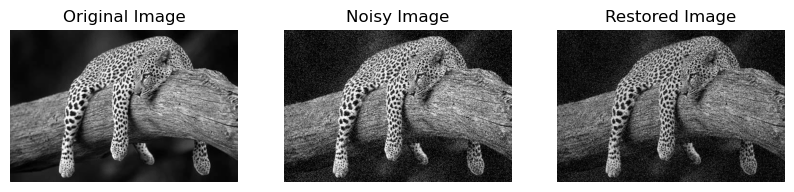

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
# from scipy.signal import convolve2d
# from scipy.fftpack import fft2,ifft2,fftshift

def wiener_filter(img, kernel, K = 10):
    dummy = np.copy(img)
    kernel = np.pad(kernel, [(0, dummy.shape[0] - kernel.shape[0]), (0, dummy.shape[1] - kernel.shape[1])], 'constant')
    # Fourier Transform
    dummy = fft2(dummy)
    kernel = fft2(kernel)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return np.uint8(dummy)

image=cv2.imread('C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif',0)

kernel_size=2
kernel=np.ones((kernel_size,kernel_size))/(kernel_size**2)

noise_std=30
noisy_image=image+noise_std*np.random.randn(*image.shape)

noisy_image=np.clip(noisy_image,0,255)
noisy_image=noisy_image.astype(np.uint8)

#Apply Wiener Filter
K=0.6
restored_image=wiener_filter(noisy_image,kernel,K)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1) 
plt.title('Original Image') 
plt.imshow(image, cmap='gray') 
plt.axis('off') 
plt.subplot(1, 3, 2) 
plt.title('Noisy Image') 
plt.imshow(noisy_image, cmap='gray') 
plt.axis('off') 
plt.subplot(1, 3, 3) 
plt.title('Restored Image') 
plt.imshow(restored_image, cmap='gray') 
plt.axis('off')